# Import The Needed Packages

In [8]:
#Import Python Libraries
import numpy as np
import pandas as pd
import tweepy 
import csv
import re
import string
import nltk 
from nltk.tokenize import RegexpTokenizer # devide the words 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn
import csv
import re # for regular expression
import string
from datetime import datetime
import nltk 
from nltk.tokenize import RegexpTokenizer # devide the words 
from collections import Counter #count the number of word for each list 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
#import plotly
#import plotly.plotly as py
#import plotly.graph_objs as go
#plotly.tools.set_credentials_file(username='XXXXXX', api_key='XXXXXXX')

%matplotlib inline
# change the seeting of the cells to show the entire content of coulmn ( eexpand the size of coulmn)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics
#For Descision Tree Visualization
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz 
#import pydotplus

In [10]:
#from credentials import *

# Connecting to Twitter API

In [11]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

NameError: name 'consumer_key' is not defined

# Reading The CSV File

In [ ]:
#Read csv file      we have a new version dont use this file
df = pd.read_csv("final_cleaned.csv")

In [ ]:
#How much data do i have
len(df)

In [4]:
#See part of the Data to inderstand the data
df.tail(1)

NameError: name 'df' is not defined

In [5]:
# Print a concise summary of a DataFrame
df.info()

NameError: name 'df' is not defined

In [6]:
#Getting to know the Data type
df.dtypes

date          object 
text          object 
id            float64
stance        object 
location      object 
clean text    object 
tokens        object 
City          object 
dtype: object

# Filling the nulls in Location Colomn

In [7]:
# replace NA values
df['location'].fillna("Not Given", inplace=True)

# Importing the City Dictionary

In [8]:
from Dictionary import *

# If the import resulted in an error here's the dictionary

In [9]:

CityDictionary = { 'Riyadh':'Riyadh','Ryiadh':'Riyadh','الرياض':'Riyadh','رياض':'Riyadh','رياضه':'Riyadh',
                     'ارياظ':'Riyadh','riydh':'Riyadh','ryiadh':'Riyadh','Riyad':'Riyadh','riyad':'Riyadh',
                     'Riyadh, Kingdom of Saudi Arabia':'Riyadh','Ar Riyad':'Riyadh','Arriyad':'Riyadh','Alriyadh':'Riyadh',
                     'AlRiyadh':'Riyadh','الرياض, المملكة العربية السعودية':'Riyadh',
                     'Riyadh, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'Riyadh',
                     'السعودية - الرياض - جدة':'Riyadh','نجد':'Riyadh','Riyadh, Saudi Arabia الريـاض':'Riyadh',
                     'الخرج':'Riyadh','الدرعية':'Riyadh','الدرعيه':'Riyadh','الدرعية':'Riyadh','الدرعية':'Riyadh',
                     'الرياض':'Riyadh','الرياض, المملكة العربية السعود':'Riyadh','Riyadh \ K.S.A':'Riyadh',
                   #-----------------------------------Riyadh---------------------------------------
                     'مكة':'Makkah','مكه':'Makkah','مكة المكرمة':'Makkah','مكه المكرمه':'Makkah','mecca':'Makkah',
                     'Mecca':'Makkah','makkah':'Makkah','Makkah':'Makkah','Makkah AlMukarramah':'Makkah',
                     'makkah':'Makkah','makka':'Makkah','Makka':'Makkah','Makkah, Kingdom of Saudi Arabia':'Makkah',
                     'الغربيه':'Makkah','الغربيه':'Makkah','saudi arabia - makkah':'Makkah',
                    #------------------ ----------------Makkah---------------------------------------
                     'Jeddah':'Jeddah','jeddah':'Jeddah','Jedda':'Jeddah','jeddah':'Jeddah','جدة':'Jeddah','jeddah':'Jeddah',
                     'جده':'Jeddah','Jeddah, Kingdom of Saudi Arabia':'Jeddah','Jedah':'Jeddah','jedah':'Jeddah',
                     'Jeddah, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'Jeddah',
                     'جدة, المملكة العربية السعودية':'Jeddah','جده':'Jeddah','Jeddah, Saudi Arabia':'Jeddah', 'جــــــــــــدة':'Jeddah',
                    #----------------------------------Jeddah---------------------------------------
                     'المدينة المنورة':'Almadina','Almadinah':'Almadina','Almadinah':'Almadina','madina':'Almadina',
                     'المدينه المنوره':'Almadina','المدينة المنورة, المملكة العربية السعودية':'Almadina','المدينة':'Almadina',
                     'المدينه':'Almadina','Medina, Kingdom of Saudi Arabia':'Almadina','Medina, Kingdom of Saudi Arabia':'Almadina',
                    'ينبع':'Almadina','ينبع, المملكة العربيه السعودية':'Almadina','Al Ola':'Almadina','العلا':'Almadina','العلا, الممكلة العربية السعودية':'Almadina',
                    'مهد الذهب':'Almadina','Madinah - Jeddah':'Almadina',
                    #---------------------------------Almadina--------------------------------------
                    'Dammam, Kingdom of Saudi Arabia':'Dammam','Dammam':'Dammam',"dammam":'Dammam','الدمام':'Dammam',' الدمام, المملكة العربية السعودية':'Dammam',
                    'دمام':'Dammam', 'Riyadh - Dammam':'Dammam',
                    #---------------------------------Dammam----------------------------------------
                     'ahsaa':'Alahsa','Alahsa':'Alahsa','الاحساء, المملكة العربية السعو':'Alahsa','الاحساء, المملكة العربية السعودية':'Alahsa',
                     'احساء':'Alahsa','الاحسا':'Alahsa','الاحساء':'Alahsa','احساء':'Alahsa','أحساء':'Alahsa','إحساء':'Alahsa',
                    #---------------------------------Alahsa----------------------------------------  
                     'الخبر':'Alkhobar','Alkhobar':'Alkhobar','alkhobar':'Alkhobar','Khobar':'Alkhobar',
                     'الخبر, المملكة العربية السعودية':'Alkhobar','Al Khobar':'Alkhobar','Al Khobar, Kingdom of Saudi Arabia':'Alkhobar'
                     ,'Al Khobar, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'Alkhobar','المنطقه الشرقيه _ الخبر':'Alkhobar', 
                    'Khobar,KSA':'Alkhobar',
                    #---------------------------------Alkhobar--------------------------------------
                     'Hafr Al Batin, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'Hafr AlBatin',
                     'Hafr Al Batin, Kingdom of Saudi Arabia':'Hafr AlBatin','حفر الباطن':'Hafr AlBatin',
                     'Hafr allbatin':'Hafr Al Batin',
                    #----------------------------------Hafr Albatin---------------------------------
                     'الظهران':'Dharan','الظهران, المملكة العربية السعودية':'Dharan','Dharan':'Dharan',
                     'Dharan, Kingdom of Saudi Arabia':'Dharan','Dharan, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'Dharan',
                    #-----------------------------------Dharran-------------------------------------
                     'Eastern Province':'Eastern Province','eastern Province':'Eastern Province','Eastern Province, Kingdom of Saudi Arabia':'Eastern Province',
                     'Eastern Province, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'Eastern Province',
                     'المنطقة الشرقية, المملكة العربية السعودية':'Eastern Province','الشرقية':'Eastern Province','المنطقة الشرقية':'Eastern Province',
                    'الخفجي':'Eastern Province', 'Khafji, Kingdom of Saudi Arabia':'Eastern Province', 'Khafji':'Eastern Province','Eastern, Kingdom of Saudi Arabia':'Eastern Province',
                    #-----------------------------------Eastern Province------------------------------
                     'Aljubail':'AlJubail','Al jubail':'AlJubail','jubail':'AlJubail','AlJubail':'AlJubail','Al Jubail, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'AlJubail',
                     'الجبيل':'AlJubail','جبيل الصناعية':'AlJubail','جبيل':'AlJubail', 'الجبيل, المملكة العربية السعودية':'AlJubail',
                    #--------------------------------------Al Jubail----------------------------------
                    'القطيف':'AlQatif','قطيف':'AlQatif','القطيف, المملكة العربية السعودية':'AlQatif','Qatif':'AlQatif','AlQatif':'AlQatif',
                    'Al Qatif, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'AlQatif','qateef':'AlQatif','el qatif':'AlQatif','qateef':'AlQatif',
                    #----------------------------------------Al Qateef -------------------------------------
                    'Hail':'Hail','hail':'Hail','Hail, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'Hail',
                    'حائل':'Hail','حائل, المملكة العربية السعودية':'Hail','حايل':'Hail','hail ':'Hail','Hail, Kingdom of Saudi Arabia':'Hail',
                    #---------------------------------------- Hail -----------------------------
                    'Al Qassim':'AlQassim','AlQassim':'AlQassim','Qassim':'AlQassim','qassim':'AlQassim','Al qassim':'AlQassim','Al Qassim, Kingdom of Saudi Arabia':'AlQassim',
                    'Al Qassim, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'AlQassim','القصيم':'AlQassim','قصيم':'AlQassim','القصيم, المملكة العربية السعودية':'AlQassim',
                    'بريدة':'AlQassim','بريده':'AlQassim','عنيزة':'AlQassim','عنيزه':'AlQassim','الرس':'AlQassim','Unayzah':'AlQassim','Ar Rass':'AlQassim',
                    'Buraydah':'AlQassim',
                    #----------------------------------------AL Qassim-------------------------------
                    'عسير':'Aseer Province','أبها':'Aseer Province','خميس مشيط':'Aseer Province','بيشه':'Aseer Province','بيشة':'Aseer Province',
                    'ابها':'Aseer Province','النماص':'Aseer Province','Abha, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'Aseer Province',
                    'Al Namas':'Aseer Province','Bisha':'Aseer Province','ابها, المملكة العربية السعودية':'Aseer Province',
                    #---------------------------------------- Aseer----------------------------------
                    'تبوك':'Tabuk','Tabuk':'Tabuk','Tabuk, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'Tabuk','tabuk':'Tabuk','تبوك, المملكة العربية السعودية':'Tabuk',
                    #--------------------------------------- Tabuk ----------------------------------
                    'Jazan':'Jazan','Jazan, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'Jazan','jazan':'Jazan','Jizan':'Jazan','jezan':'Jazan',
                    'جازان':'Jazan','جيزان':'Jazan','جزر فرسان':'Jazan','صبيا':'Jazan','جازان, المملكة العربية السعودية':'Jazan',
                    #-----------------------------------------Jazan----------------------------------
                    'نجران':'Najran', 'نجران, المملكة العربية السعودية':'Najran', 'Najran':'Najran', 'Najran, Kingdom of Saudi Arabia':'Najran', 
                    'شرورة':'Najran','شروره':'Najran', 'Najran, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'Najran', 
                    #---------------------------------------- Najran---------------------------------
                    'الباحه':'AlBahah','AlBahah':'AlBahah','AlBahah, Kingdom of Saudi Arabia':'AlBahah','AlBahah, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'AlBahah','الباحة':'AlBahah',
                    'الباحه':'AlBahah','الباحة, المملكة العربية السعودية':'AlBahah',
                    #---------------------------------------AlBahah----------------------------------
                    'الطائف':'Taif','طائف':'Taif','الطائف, المملكة العربية السعودية':'Taif',
                    'Al Taif':'Taif','Taif':'Taif','Taif, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'Taif',
                    'Taif, Kingdom of Saudi Arabia':'Taif','الطائف':'Taif','الطائف':'Taif',
                    'الطائف':'Taif','الطائف':'Taif','الطائف':'Taif','الطائف':'Taif','‏﮼قلب ‏﮼الطائف':'Taif',
                    #-------------------------------------Taif----------------------------------------
                    'عرعر':'Northen Province', 'رفحاء':'Northen Province', 'عرعر, المملكة العربية السعودية':'Northen Province', 'Arar':'Northen Province',
                    'Arar, Kingdom of Saudi Arabia':'Northen Province','Arar, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'Northen Province',
                    'طريف':'Northen Province','العويقلية':'Northen Province',
                    #------------------------------------Northen Province-----------------------------
                    'الجوف':'AlJowf', 'Al Jowf':'AlJowf', 'الجوف,المملكة العربية السعودية':'AlJowf', 'جوف':'AlJowf', 'سكاكا':'AlJowf',
                    'Sakaka, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'AlJowf','Sakaka, Kingdom of Saudi Arabia':'AlJowf',
                    'Sakaka':'AlJowf',
                    #--------------------------------------Al Jowf------------------------------------
                    'Shaybah, Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'Shaybah',
                    # if it's in saudi but not specified yet.
                    'KSA':'Not Given','المملكة العربية السعودية':'Not Given','المملكة العربية السعودية 🇸🇦':'Not Given','KSA🇸🇦':'Not Given',
                    'SA':'Not Given','ksa':'Not Given','K.s.a ...':'Not Given','k.s.a':'Not Given','K.S.A':'Not Given','العربيه السعوديةمملكةالانسانيه':'Not Given',
                    'السعودية':'Not Given','سعودية':'Not Given','Kingdom of Saudi Arabia':'Not Given','k s a':'Not Given',
                    'Kingdom of Saudi Arabia, Kingdom of Saudi Arabia':'Not Given','kSA':'Not Given',', المملكة العربية السعودية':'Not Given',
                    '🇸🇦':'Not Given','ksa':'Not Given','السعوديه العظمى':'Not Given', 'Kingdom Saudi Arabia':'Not Given', 'المملكة العربيه السعوديه':'Not Given',
                    # if the country is not given then also put not give
                    'Not Given':'Not Given',
                   }

# mapping the city Colomn with dictionary

In [10]:
df['City'] = df['location'].map(CityDictionary)
df['City'].fillna("Other Country", inplace=True)

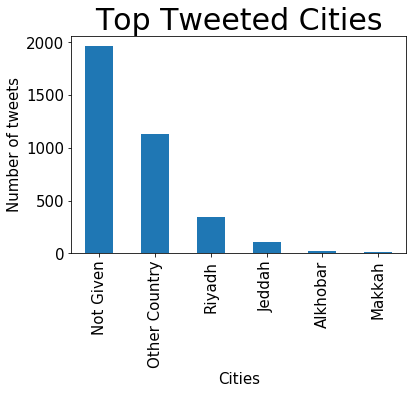

In [11]:
tempo =  df['City'].value_counts()
# visualize the results in a better way!
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.set_xlabel('Cities' , fontsize=15)
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Top Tweeted Cities', fontsize=30)

tempo[:6].plot(ax=ax, kind='bar')

# Q: What is the distribution of stance?

In [12]:
df['stance '][:10]

0    Natural 
1    Natural 
2    Negative
3    Natural 
4    Positive
5    Natural 
6    Natural 
7    Positive
8    Natural 
9    Natural 
Name: stance , dtype: object

In [13]:
tweets_by_stance =df['stance '].value_counts()

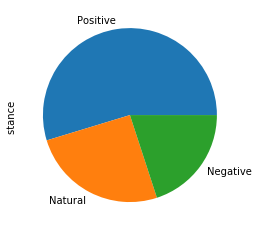

In [14]:
# visualize the results
tweets_by_stance.plot(kind='pie')

In [2]:
# visualize the results in a better way!

fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Stance ', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Distribution of stance', fontsize=15, fontweight='bold')

tweets_by_stance.plot(ax=ax, kind='bar')

NameError: name 'plt' is not defined

# Time serise analysis


In [6]:
#first, we need to convert the date column to a datetime object
df["Date_Time"]=pd.to_datetime(df['date'])

NameError: name 'df' is not defined

In [17]:
#creat a new data frame
Date_df=df[['Date_Time','stance ']].copy()

In [18]:
# create a new column for dates
Date_df['Date'] = Date_df['Date_Time'].dt.date 

In [19]:
# count unique dates
df_by_date = Date_df.groupby('Date').count()

In [20]:
# make the date as the index for the visualization 
df_by_date['Date'] = df_by_date.index

### When people with positive attitude ?

In [21]:
#creat a new data frame
Positive_Date_df=Date_df[Date_df["stance "]=='Positive']
Positive_df_by_date = Positive_Date_df.groupby('Date').count()

In [22]:
Positive_df_by_date['Date'] = Positive_df_by_date.index

In [1]:
#fig = px.histogram(Positive_df_by_date, x="Date", y="Date_Time")
fig = px.bar(x=Positive_df_by_date['Date'], y=Positive_df_by_date['Date_Time'], labels={'x':'Date', 'y':'Number of tweets'})
fig.show()

NameError: name 'px' is not defined

### When people with negative attitude ?

In [24]:
#creat a new data frame
Negative_Date_df=Date_df[Date_df["stance "]=='Negative']
Negative_df_by_date =Negative_Date_df.groupby('Date').count()



In [25]:
Negative_df_by_date['Date'] = Negative_df_by_date.index

In [26]:
#fig = px.histogram(Positive_df_by_date, x="Date", y="Date_Time")
fig = px.bar(x=Negative_df_by_date['Date'], y=Negative_df_by_date['Date_Time'], labels={'x':'Date', 'y':'Number of tweets'})
fig.show()

In [27]:
# this code is for finding duplicates - Abeer
df.duplicated()
duplicate_rows_df = df.duplicated().sum()
print ("number of duplicate rows: ", duplicate_rows_df)

number of duplicate rows:  0


In [28]:
# Retrieve list of columns
df.columns

Index(['date', 'text', 'id', 'stance ', 'location', 'clean text', 'tokens',
       'City', 'Date_Time'],
      dtype='object')

# Data Cleaning

In [29]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [30]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [31]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [32]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [33]:
#start processing the tweet
def processPost(tweet):

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', str(tweet))
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',str(tweet))
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(str(tweet))
    
    # normalize the tweet
    tweet= normalize_arabic(str(tweet))
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)

    #Remove new lines with white space
    tweet = str(tweet).replace('\n',' ')
    tweet = str(tweet).replace('\t',' ')
    
    #remove emoji
    tweet = remove_emoji(tweet)
        
    return tweet

In [34]:
# remove Arabic stop words from the tweets
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
ar_stops = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# remove Arabic stop words from the tweets
for word in df['text']:
    if word in ar_stops:        
        words_filtered.remove(word)

In [36]:
df["clean text"] = df['text'].apply(lambda x: processPost(x))

In [37]:
dff =pd.read_csv("final_cleaned.csv")   

In [38]:
dff["clean text"] = df['text'].apply(lambda x: processPost(x))

In [39]:
pd.set_option('display.max_colwidth', -1)  
print(df.iloc[528])

date          1/6/2020 5:23                                                                                              
text          عساك تفوزين بس انتي عاد احسك ماتلعبين الا برهان اكتتاب ارامكو شكله جاء منها☻                               
id            1.21e+18                                                                                                   
stance        Natural                                                                                                    
location      Not Given                                                                                                  
clean text    عساك تفوزين بس انتي عاد احسك ماتلعبين الا برهان اكتاب ارامكو شكله جاء منها                                 
tokens        ['اتوقع', 'انا', 'في', 'مرحله', 'الاندفاع', 'خاصه', 'بعد', 'اكتاب', 'ارامكو', 'ناس', 'دخلت', 'لاول', 'مره']
City          Not Given                                                                                                  
Date_Time     2020-01-06

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



# Drop Unwanted Colomns

In [26]:
# Drop The unwanted Colomns ()
temp = df.drop(['Unnamed: 0','username','to','replies','retweets','favorites','geo','mentions','hashtags','permalink'],axis=1)

KeyError: "['Unnamed: 0' 'username' 'to' 'replies' 'retweets' 'favorites' 'geo'\n 'mentions' 'hashtags' 'permalink'] not found in axis"

# Save the Cleaned Data into a new CSV file

In [15]:
temp.to_csv("CLEANED DATA1.csv",index=False,encoding="utf-8-sig")

NameError: name 'temp' is not defined

In [40]:
df=pd.read_excel("newExtractedData.xlsx")

In [41]:
#The method that will get the location for the tweet it recevies tweet ID as parametr 
def setLocation(j):
    try:
        tweet=api.get_status(j)
        
        
    except:
        return None
    location = None
        

        # Try coordinates first, as it gives the most concrete data.
        
    if tweet.coordinates :
        location = (tweet.coordinates.coordinates).toString()
        
       # Next up, try tweet.place, which could also have a full street address, and will have at least the full_name and country, if not null 
    elif tweet.place :
        street = ""
        #if tweet.place.attributes.street_address:
         #   street += tweet.place.attributes.street_address + ", "
          #  if tweet.place.attributes['623:id']:
           #     street += tweet.place.attributes['623:id'] + ", "
             
        location = street + tweet.place.full_name + ", " + tweet.place.country
        # Lastly, if all else fails, grab the user location. This data is pretty poor, but is at least something. You may not want it, depending on your usage.
    elif tweet.user and tweet.user.location:
            location = tweet.user.location        
         
    return location

In [42]:
#Put the "permalink" colume in list
lin_data=df['permalink'].values.tolist()
newL=[]

In [43]:
#Cut the ID form the permalink and add it in a list
z=0
for l in lin_data:
    e=lin_data[z] +""
    s=e[-19:]
    index=s.find('/')
    if(index!= -1):
        s=s[index+1:]
    newL.append(s)
    z=z+1

In [44]:
#Pass each ID to setLocation method and add the returned value in a list
newLocation=[]
for j in newL:
    newLocation.append(setLocation(j))
    


In [45]:
#Add new colume(location)
df['location'] =newLocation

In [46]:
#Drop unwanted columes
temp = df.drop(['username','to','replies','retweets','favorites','geo','mentions','hashtags','permalink'],axis=1)

In [47]:
temp.to_csv("CLEANED DATA1.csv",index=False,encoding="utf-8-sig")

In [48]:
#Add tokens
tokenizer = RegexpTokenizer(r'\w+')
dff["tokens"] = dff["clean text"].apply(tokenizer.tokenize)

In [17]:
dff.to_csv("final_cleaned.csv",index=False,encoding="utf-8-sig")

In [49]:
dff.head(5)

,date,text,id,stance,location,clean text,tokens,City
0,3/7/2020 20:40,السلام عليكم هل اقدر ابيع جزء من اسهم اكتتاب ارامكو ؟ من تطبيق المباشر للافراد,1.240000e+18,Natural,Not Given,السلام عليكم هل اقدر ابيع جزء من اسهم اكتاب ارامكو من تطبيق المباشر لافراد,"[السلام, عليكم, هل, اقدر, ابيع, جزء, من, اسهم, اكتاب, ارامكو, من, تطبيق, المباشر, لافراد]",Not Given
1,3/7/2020 10:26,#تاسي مساء الخير ... غداً تستأنف التداولات في السوق السعودي بعد فشل اتفاق اوبك بلس وهبوط اسعار النفط لمستويات متدنية جديدة * توقعاتكم للاسبوع المقبل ؟ كتوقع شخصي ١. كسر سعر اكتتاب ارامكو . ٢. كسر مستوى ٧٠٠٠ نقطة . ٣. هناك أسهم ستعاكس اتجاه السوق موفقين,1.240000e+18,Natural,Not Given,تاسي مساء الخير غداً تستانف التداولات في السوق السعودي بعد فشل اتفاق اوبك بلس وهبوط اسعار النفط لمستويات متدنيه جديده توقعاتكم لاسبوع المقبل كتوقع شخصي ١ كسر سعر اكتاب ارامكو ٢ كسر مستوي ٧٠ نقطه ٣ هناك اسهم ستعاكس اتجاه السوق موفقين,"[تاسي, مساء, الخير, غدا, تستانف, التداولات, في, السوق, السعودي, بعد, فشل, اتفاق, اوبك, بلس, وهبوط, اسعار, النفط, لمستويات, متدنيه, جديده, توقعاتكم, لاسبوع, المقبل, كتوقع, شخصي, ١, كسر, سعر, اكتاب, ارامكو, ٢, كسر, مستوي, ٧٠, نقطه, ٣, هناك, اسهم, ستعاكس, اتجاه, السوق, موفقين]",Not Given
2,3/7/2020 10:11,والله يابو دانة لعنة انهيار السوق ٢٠٠٦ حتى اليوم ملاحقة سوقنا ، ومع اكتتاب ارامكو عدد كبير من الناس اكتتبو وصارو يتابعون السوق وأصبح في اهتمام في الفرص الي فيه وللأسف خابت توقعات الكثير منهم ، اعتقد نحتاج فتره زمنية اطول وتحسن الأوضاع الاقتصادية علشان نصل للمستويات الي ذكرها الاخ,1.240000e+18,Negative,Kingdom of Saudi Arabia,واله يابو دانه لعنه انهيار السوق ٢٠٦ حتي اليوم ملاحقه سوقنا ومع اكتاب ارامكو عد كبير من الناس اكتبو وصارو يتابعون السوق واصبح في اهتمام في الفرص الي فيه ولاسف خابت توقعات الكثير منهم اعتقد نحتاج فتره زمنيه اطول وتحسن الاوضاع الاقتصاديه علشان نصل لمستويات الي ذكرها الاخ,"[واله, يابو, دانه, لعنه, انهيار, السوق, ٢٠٦, حتي, اليوم, ملاحقه, سوقنا, ومع, اكتاب, ارامكو, عد, كبير, من, الناس, اكتبو, وصارو, يتابعون, السوق, واصبح, في, اهتمام, في, الفرص, الي, فيه, ولاسف, خابت, توقعات, الكثير, منهم, اعتقد, نحتاج, فتره, زمنيه, اطول, وتحسن, الاوضاع, الاقتصاديه, علشان, نصل, لمستويات, الي, ذكرها, الاخ]",Not Given
3,3/7/2020 9:50,استثمار مادي في العلاقه ! هذا اكتتاب ارامكو مو حب,1.240000e+18,Natural,قضاعه,استثمار مادي في العلاقه هذا اكتاب ارامكو مو حب,"[استثمار, مادي, في, العلاقه, هذا, اكتاب, ارامكو, مو, حب]",Other Country
4,3/7/2020 8:07,بالنسبة للميزانية السعوديه فقد خرجت من أزمة اسعار النفط على الأقل للخمس سنوات القادمه بسبب اكتتاب أرامكو و الخطه الاستثمارية الشجاعة التي اعتمدتها في السبع سنوات الاخيره وعقبال عندنا,1.240000e+18,Positive,Not Given,بالنسبه لميزانيه السعوديه فقد خرجت من ازمه اسعار النفط علي الاقل لخمس سنوات القادمه بسب اكتاب ارامكو و الخطه الاستثماريه الشجاعه التي اعتمدتها في السبع سنوات الاخيره وعقبال عندنا,"[بالنسبه, لميزانيه, السعوديه, فقد, خرجت, من, ازمه, اسعار, النفط, علي, الاقل, لخمس, سنوات, القادمه, بسب, اكتاب, ارامكو, و, الخطه, الاستثماريه, الشجاعه, التي, اعتمدتها, في, السبع, سنوات, الاخيره, وعقبال, عندنا]",Not Given


In [ ]:
temp.to_csv("CLEANED DATA1.csv",index=False,encoding="utf-8-sig")

## Classification with Decision tree

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
df_desc = pd.read_csv("final_cleaned.csv")
df_desc.head(5)

,date,text,id,stance,location,clean text,tokens,City
0,3/7/2020 20:40,السلام عليكم هل اقدر ابيع جزء من اسهم اكتتاب ارامكو ؟ من تطبيق المباشر للافراد,1.240000e+18,Natural,Not Given,السلام عليكم هل اقدر ابيع جزء من اسهم اكتاب ارامكو من تطبيق المباشر لافراد,"['السلام', 'عليكم', 'هل', 'اقدر', 'ابيع', 'جزء', 'من', 'اسهم', 'اكتاب', 'ارامكو', 'من', 'تطبيق', 'المباشر', 'لافراد']",Not Given
1,3/7/2020 10:26,#تاسي مساء الخير ... غداً تستأنف التداولات في السوق السعودي بعد فشل اتفاق اوبك بلس وهبوط اسعار النفط لمستويات متدنية جديدة * توقعاتكم للاسبوع المقبل ؟ كتوقع شخصي ١. كسر سعر اكتتاب ارامكو . ٢. كسر مستوى ٧٠٠٠ نقطة . ٣. هناك أسهم ستعاكس اتجاه السوق موفقين,1.240000e+18,Natural,Not Given,تاسي مساء الخير غداً تستانف التداولات في السوق السعودي بعد فشل اتفاق اوبك بلس وهبوط اسعار النفط لمستويات متدنيه جديده توقعاتكم لاسبوع المقبل كتوقع شخصي ١ كسر سعر اكتاب ارامكو ٢ كسر مستوي ٧٠ نقطه ٣ هناك اسهم ستعاكس اتجاه السوق موفقين,"['تاسي', 'مساء', 'الخير', 'غدا', 'تستانف', 'التداولات', 'في', 'السوق', 'السعودي', 'بعد', 'فشل', 'اتفاق', 'اوبك', 'بلس', 'وهبوط', 'اسعار', 'النفط', 'لمستويات', 'متدنيه', 'جديده', 'توقعاتكم', 'لاسبوع', 'المقبل', 'كتوقع', 'شخصي', '١', 'كسر', 'سعر', 'اكتاب', 'ارامكو', '٢', 'كسر', 'مستوي', '٧٠', 'نقطه', '٣', 'هناك', 'اسهم', 'ستعاكس', 'اتجاه', 'السوق', 'موفقين']",Not Given
2,3/7/2020 10:11,والله يابو دانة لعنة انهيار السوق ٢٠٠٦ حتى اليوم ملاحقة سوقنا ، ومع اكتتاب ارامكو عدد كبير من الناس اكتتبو وصارو يتابعون السوق وأصبح في اهتمام في الفرص الي فيه وللأسف خابت توقعات الكثير منهم ، اعتقد نحتاج فتره زمنية اطول وتحسن الأوضاع الاقتصادية علشان نصل للمستويات الي ذكرها الاخ,1.240000e+18,Negative,Kingdom of Saudi Arabia,واله يابو دانه لعنه انهيار السوق ٢٠٦ حتي اليوم ملاحقه سوقنا ومع اكتاب ارامكو عد كبير من الناس اكتبو وصارو يتابعون السوق واصبح في اهتمام في الفرص الي فيه ولاسف خابت توقعات الكثير منهم اعتقد نحتاج فتره زمنيه اطول وتحسن الاوضاع الاقتصاديه علشان نصل لمستويات الي ذكرها الاخ,"['واله', 'يابو', 'دانه', 'لعنه', 'انهيار', 'السوق', '٢٠٦', 'حتي', 'اليوم', 'ملاحقه', 'سوقنا', 'ومع', 'اكتاب', 'ارامكو', 'عد', 'كبير', 'من', 'الناس', 'اكتبو', 'وصارو', 'يتابعون', 'السوق', 'واصبح', 'في', 'اهتمام', 'في', 'الفرص', 'الي', 'فيه', 'ولاسف', 'خابت', 'توقعات', 'الكثير', 'منهم', 'اعتقد', 'نحتاج', 'فتره', 'زمنيه', 'اطول', 'وتحسن', 'الاوضاع', 'الاقتصاديه', 'علشان', 'نصل', 'لمستويات', 'الي', 'ذكرها', 'الاخ']",Not Given
3,3/7/2020 9:50,استثمار مادي في العلاقه ! هذا اكتتاب ارامكو مو حب,1.240000e+18,Natural,قضاعه,استثمار مادي في العلاقه هذا اكتاب ارامكو مو حب,"['استثمار', 'مادي', 'في', 'العلاقه', 'هذا', 'اكتاب', 'ارامكو', 'مو', 'حب']",Other Country
4,3/7/2020 8:07,بالنسبة للميزانية السعوديه فقد خرجت من أزمة اسعار النفط على الأقل للخمس سنوات القادمه بسبب اكتتاب أرامكو و الخطه الاستثمارية الشجاعة التي اعتمدتها في السبع سنوات الاخيره وعقبال عندنا,1.240000e+18,Positive,Not Given,بالنسبه لميزانيه السعوديه فقد خرجت من ازمه اسعار النفط علي الاقل لخمس سنوات القادمه بسب اكتاب ارامكو و الخطه الاستثماريه الشجاعه التي اعتمدتها في السبع سنوات الاخيره وعقبال عندنا,"['بالنسبه', 'لميزانيه', 'السعوديه', 'فقد', 'خرجت', 'من', 'ازمه', 'اسعار', 'النفط', 'علي', 'الاقل', 'لخمس', 'سنوات', 'القادمه', 'بسب', 'اكتاب', 'ارامكو', 'و', 'الخطه', 'الاستثماريه', 'الشجاعه', 'التي', 'اعتمدتها', 'في', 'السبع', 'سنوات', 'الاخيره', 'وعقبال', 'عندنا']",Not Given


In [65]:
df_desc = df_desc.rename(columns={'stance ': 'stance'}) #rename column to remove space
df_desc= df_desc[df_desc.stance!= 'Natural']

In [81]:
# Assign X to feature varaiables
dataX = df_desc[['clean text']].values
dataX[0:8]

array([['واله يابو دانه لعنه انهيار السوق ٢٠٦ حتي اليوم ملاحقه سوقنا ومع اكتاب ارامكو عد كبير من الناس اكتبو وصارو يتابعون السوق واصبح في اهتمام في الفرص الي فيه ولاسف خابت توقعات الكثير منهم اعتقد نحتاج فتره زمنيه اطول وتحسن الاوضاع الاقتصاديه علشان نصل لمستويات الي ذكرها الاخ'],
       ['بالنسبه لميزانيه السعوديه فقد خرجت من ازمه اسعار النفط علي الاقل لخمس سنوات القادمه بسب اكتاب ارامكو و الخطه الاستثماريه الشجاعه التي اعتمدتها في السبع سنوات الاخيره وعقبال عندنا'],
       ['السعوديه اصابها الشل الرباعي من يوم مامسك محمد بن سلمان الحكم الغلا زاد التجار انحاشوا بسب الرسوم البنزين صار غالي صار عندنا فقراء ومعدومين فرض الضريبه الي عمرنا ماسمعنا عنها حتي قبل البترول البطاله زادت معدل الجريمه زاد ركود اقتصادي وفشل في اكتاب ارامكو'],
       ['في اكتاب ارامكو احسب اني بصير غني بسبه'],
       ['اكتابارامكو يبدا ١ نوفمبر'],
       ['حساب المواطن اكتاب ارامكو قائمه البنوك المشاركه في اكتاب ارا '],
       ['بنك سامبا لم يستفد من اكتاب ارامكو كيف يستفيد الجزيره من اندماج المترديه والنطيحه'],
   

In [82]:
df_desc.tail(5)

,date,text,id,stance,location,clean text,tokens,City
3672,12/5/2019 21:54,#اكتتاب_أرامكو تخصيص ١٥٠٠ سهم كحد اعلى للفرد الواحد رقم كبير والله ، كنت متوقع ٣٠٠ سهم ، اعتقد فرصه وضاعت,1.200000e+18,Positive,Not Given,وضع المكتبين في ارامكو اليوم نجاحاكتابارامكو,"['وضع', 'المكتبين', 'في', 'ارامكو', 'اليوم', 'نجاحاكتابارامكو']",Not Given
3673,12/5/2019 21:54,اكتتاب أرامكو يجمع 446 مليار ريال بتغطية 465%.. و32 ريالا تسعير نهائي http://dlvr.it/RKlMYl,1.200000e+18,Negative,العربيه السعوديةمملكةالانسانيه,بلغت القيمه السوقيه ل ارامكو السعوديه بنهايه جلسه اليوم نحو 704 تريليون ريال لتقفز براس المال السوقي ل تداول الي نحو 895 تريليون ريال مقابل نحو 189 تريليون ريال بالجلسه السابقه التفاصيل نجاحاكتابارامكو تداولارامكو سهمارامكو,"['بلغت', 'القيمه', 'السوقيه', 'ل', 'ارامكو', 'السعوديه', 'بنهايه', 'جلسه', 'اليوم', 'نحو', '704', 'تريليون', 'ريال', 'لتقفز', 'براس', 'المال', 'السوقي', 'ل', 'تداول', 'الي', 'نحو', '895', 'تريليون', 'ريال', 'مقابل', 'نحو', '189', 'تريليون', 'ريال', 'بالجلسه', 'السابقه', 'التفاصيل', 'نجاحاكتابارامكو', 'تداولارامكو', 'سهمارامكو']",Not Given
3675,12/5/2019 21:54,#اكتتاب_ارامكو الحمد الله مكتتب ب 10 اسهم بس القناعه شي جميل,1.200000e+18,Positive,الرياض,نجاحاكتابارامكو ثقافه الكسب السريع هي عثره في طريق الحريهالماليه,"['نجاحاكتابارامكو', 'ثقافه', 'الكسب', 'السريع', 'هي', 'عثره', 'في', 'طريق', 'الحريهالماليه']",Other Country
3676,12/5/2019 21:54,#اكتتاب_أرامكو هو الأكبر بالعالم • إجمالي الأموال المجمعة 446 مليار • تخصيص 1500 سهم للمكتتب الفرد الواحد في #ارامكوا,1.200000e+18,Positive,Not Given,تسوق مع نون لحصول علي خصم 10 استخدام كود الخصم LMN48 نجاحاكتابارامكو,"['تسوق', 'مع', 'نون', 'لحصول', 'علي', 'خصم', '10', 'استخدام', 'كود', 'الخصم', 'LMN48', 'نجاحاكتابارامكو']",Not Given
3677,12/5/2019 21:54,#اكتتاب_أرامكو يصبح الأكبر في العالم بقيمة 25.6 مليار دولار • تخطّت قيمة #طلبات_الاكتتاب 119 مليار دولار,1.200000e+18,Positive,"الرياض, المملكة العربية السعودية",مكن تعيدون الاكتاب شوي نبغي نكتب انا وصاحبتي نجاحاكتابارامكو,"['مكن', 'تعيدون', 'الاكتاب', 'شوي', 'نبغي', 'نكتب', 'انا', 'وصاحبتي', 'نجاحاكتابارامكو']",Riyadh


In [83]:
# Assign y to target varaiable (stance)
y = df_desc['stance']
y[0:8]

2     Negative
4     Positive
7     Positive
11    Positive
13    Negative
21    Positive
23    Negative
24    Negative
Name: stance, dtype: object

In [84]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_dec = TfidfVectorizer()
X = tf_dec.fit_transform(dataX.ravel())

In [95]:
#Splitting of Data into train and test set took 30% of data as testing and 70% for training the model
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3) 

In [96]:
print(np.shape(X_trainset))
print(np.shape(y_trainset))

(1923, 12968)
(1923,)


In [97]:
print(np.shape(X_testset))
print(np.shape(y_testset))

(825, 12968)
(825,)


In [98]:
descTree = DecisionTreeClassifier(criterion="entropy",max_depth=None) # Define Model
descTree.fit(X_trainset,y_trainset) # train the model using training set
predTree = descTree.predict(X_testset)  # test the model using testing set
descTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Accuracy of classifier

In [99]:
print (predTree [0:8])
print (y_testset [0:8])

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive']
2395    Negative
341     Negative
1736    Negative
3048    Positive
3275    Negative
1771    Positive
2712    Positive
3328    Negative
Name: stance, dtype: object


In [100]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6484848484848484


#### Do a 10 fold cross-validation 

In [101]:
results_dt = cross_val_score(descTree, X,y, cv=10)
print("\n10-fold cross-validation:")
print(results_dt)

print("The average accuracy of the Decision tree classifier is : %.2f" % np.mean(results_dt))

print("\nConfusion matrix of the Decision tree classifier:")
predicted_dt = descTree.predict(X_testset)
print(confusion_matrix(y_testset,predicted_dt))


print("\nClassification_report of Decision tree classifier:")
print(classification_report(y_testset,predicted_dt))
print("----------------------------------------------------------------------------")


10-fold cross-validation:
[0.57090909 0.58545455 0.57818182 0.63272727 0.64363636 0.63272727
 0.62545455 0.63272727 0.5729927  0.61678832]
The average accuracy of the Decision tree classifier is : 0.61

Confusion matrix of the Decision tree classifier:
[[ 57 156]
 [134 478]]

Classification_report of Decision tree classifier:
              precision    recall  f1-score   support

    Negative       0.30      0.27      0.28       213
    Positive       0.75      0.78      0.77       612

    accuracy                           0.65       825
   macro avg       0.53      0.52      0.52       825
weighted avg       0.64      0.65      0.64       825

----------------------------------------------------------------------------


# Naive Bayes

In [38]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics

In [39]:
df = pd.read_csv("final_cleaned.csv")

In [6]:
df.head()

,date,text,id,stance,location,clean text,tokens,City
0,3/7/2020 20:40,السلام عليكم هل اقدر ابيع جزء من اسهم اكتتاب ارامكو ؟ من تطبيق المباشر للافراد,1.240000e+18,Natural,Not Given,السلام عليكم هل اقدر ابيع جزء من اسهم اكتاب ارامكو من تطبيق المباشر لافراد,"['السلام', 'عليكم', 'هل', 'اقدر', 'ابيع', 'جزء', 'من', 'اسهم', 'اكتاب', 'ارامكو', 'من', 'تطبيق', 'المباشر', 'لافراد']",Not Given
1,3/7/2020 10:26,#تاسي مساء الخير ... غداً تستأنف التداولات في السوق السعودي بعد فشل اتفاق اوبك بلس وهبوط اسعار النفط لمستويات متدنية جديدة * توقعاتكم للاسبوع المقبل ؟ كتوقع شخصي ١. كسر سعر اكتتاب ارامكو . ٢. كسر مستوى ٧٠٠٠ نقطة . ٣. هناك أسهم ستعاكس اتجاه السوق موفقين,1.240000e+18,Natural,Not Given,تاسي مساء الخير غداً تستانف التداولات في السوق السعودي بعد فشل اتفاق اوبك بلس وهبوط اسعار النفط لمستويات متدنيه جديده توقعاتكم لاسبوع المقبل كتوقع شخصي ١ كسر سعر اكتاب ارامكو ٢ كسر مستوي ٧٠ نقطه ٣ هناك اسهم ستعاكس اتجاه السوق موفقين,"['تاسي', 'مساء', 'الخير', 'غدا', 'تستانف', 'التداولات', 'في', 'السوق', 'السعودي', 'بعد', 'فشل', 'اتفاق', 'اوبك', 'بلس', 'وهبوط', 'اسعار', 'النفط', 'لمستويات', 'متدنيه', 'جديده', 'توقعاتكم', 'لاسبوع', 'المقبل', 'كتوقع', 'شخصي', '١', 'كسر', 'سعر', 'اكتاب', 'ارامكو', '٢', 'كسر', 'مستوي', '٧٠', 'نقطه', '٣', 'هناك', 'اسهم', 'ستعاكس', 'اتجاه', 'السوق', 'موفقين']",Not Given
2,3/7/2020 10:11,والله يابو دانة لعنة انهيار السوق ٢٠٠٦ حتى اليوم ملاحقة سوقنا ، ومع اكتتاب ارامكو عدد كبير من الناس اكتتبو وصارو يتابعون السوق وأصبح في اهتمام في الفرص الي فيه وللأسف خابت توقعات الكثير منهم ، اعتقد نحتاج فتره زمنية اطول وتحسن الأوضاع الاقتصادية علشان نصل للمستويات الي ذكرها الاخ,1.240000e+18,Negative,Kingdom of Saudi Arabia,واله يابو دانه لعنه انهيار السوق ٢٠٦ حتي اليوم ملاحقه سوقنا ومع اكتاب ارامكو عد كبير من الناس اكتبو وصارو يتابعون السوق واصبح في اهتمام في الفرص الي فيه ولاسف خابت توقعات الكثير منهم اعتقد نحتاج فتره زمنيه اطول وتحسن الاوضاع الاقتصاديه علشان نصل لمستويات الي ذكرها الاخ,"['واله', 'يابو', 'دانه', 'لعنه', 'انهيار', 'السوق', '٢٠٦', 'حتي', 'اليوم', 'ملاحقه', 'سوقنا', 'ومع', 'اكتاب', 'ارامكو', 'عد', 'كبير', 'من', 'الناس', 'اكتبو', 'وصارو', 'يتابعون', 'السوق', 'واصبح', 'في', 'اهتمام', 'في', 'الفرص', 'الي', 'فيه', 'ولاسف', 'خابت', 'توقعات', 'الكثير', 'منهم', 'اعتقد', 'نحتاج', 'فتره', 'زمنيه', 'اطول', 'وتحسن', 'الاوضاع', 'الاقتصاديه', 'علشان', 'نصل', 'لمستويات', 'الي', 'ذكرها', 'الاخ']",Not Given
3,3/7/2020 9:50,استثمار مادي في العلاقه ! هذا اكتتاب ارامكو مو حب,1.240000e+18,Natural,قضاعه,استثمار مادي في العلاقه هذا اكتاب ارامكو مو حب,"['استثمار', 'مادي', 'في', 'العلاقه', 'هذا', 'اكتاب', 'ارامكو', 'مو', 'حب']",Other Country
4,3/7/2020 8:07,بالنسبة للميزانية السعوديه فقد خرجت من أزمة اسعار النفط على الأقل للخمس سنوات القادمه بسبب اكتتاب أرامكو و الخطه الاستثمارية الشجاعة التي اعتمدتها في السبع سنوات الاخيره وعقبال عندنا,1.240000e+18,Positive,Not Given,بالنسبه لميزانيه السعوديه فقد خرجت من ازمه اسعار النفط علي الاقل لخمس سنوات القادمه بسب اكتاب ارامكو و الخطه الاستثماريه الشجاعه التي اعتمدتها في السبع سنوات الاخيره وعقبال عندنا,"['بالنسبه', 'لميزانيه', 'السعوديه', 'فقد', 'خرجت', 'من', 'ازمه', 'اسعار', 'النفط', 'علي', 'الاقل', 'لخمس', 'سنوات', 'القادمه', 'بسب', 'اكتاب', 'ارامكو', 'و', 'الخطه', 'الاستثماريه', 'الشجاعه', 'التي', 'اعتمدتها', 'في', 'السبع', 'سنوات', 'الاخيره', 'وعقبال', 'عندنا']",Not Given


In [40]:
df=df[ df["stance "] != "Natural"]

In [41]:
df=df[ df["stance "] != "natural"]

In [42]:
df=df[ df["stance "] != "natural "]

In [43]:
df=df[ df["stance "] != "Natural "]

In [228]:
#df.head()

,date,text,id,stance,location,clean text,tokens,City
2,03/07/2020 10:11,والله يابو دانة لعنة انهيار السوق ٢٠٠٦ حتى اليوم ملاحقة سوقنا ، ومع اكتتاب ارامكو عدد كبير من الناس اكتتبو وصارو يتابعون السوق وأصبح في اهتمام في الفرص الي فيه وللأسف خابت توقعات الكثير منهم ، اعتقد نحتاج فتره زمنية اطول وتحسن الأوضاع الاقتصادية علشان نصل للمستويات الي ذكرها الاخ,1.240000e+18,Negative,Kingdom of Saudi Arabia,واله يابو دانه لعنه انهيار السوق ٢٠٦ حتي اليوم ملاحقه سوقنا ومع اكتاب ارامكو عد كبير من الناس اكتبو وصارو يتابعون السوق واصبح في اهتمام في الفرص الي فيه ولاسف خابت توقعات الكثير منهم اعتقد نحتاج فتره زمنيه اطول وتحسن الاوضاع الاقتصاديه علشان نصل لمستويات الي ذكرها الاخ,"['واله', 'يابو', 'دانه', 'لعنه', 'انهيار', 'السوق', '٢٠٦', 'حتي', 'اليوم', 'ملاحقه', 'سوقنا', 'ومع', 'اكتاب', 'ارامكو', 'عد', 'كبير', 'من', 'الناس', 'اكتبو', 'وصارو', 'يتابعون', 'السوق', 'واصبح', 'في', 'اهتمام', 'في', 'الفرص', 'الي', 'فيه', 'ولاسف', 'خابت', 'توقعات', 'الكثير', 'منهم', 'اعتقد', 'نحتاج', 'فتره', 'زمنيه', 'اطول', 'وتحسن', 'الاوضاع', 'الاقتصاديه', 'علشان', 'نصل', 'لمستويات', 'الي', 'ذكرها', 'الاخ']",Not Given
4,03/07/2020 8:07,بالنسبة للميزانية السعوديه فقد خرجت من أزمة اسعار النفط على الأقل للخمس سنوات القادمه بسبب اكتتاب أرامكو و الخطه الاستثمارية الشجاعة التي اعتمدتها في السبع سنوات الاخيره وعقبال عندنا,1.240000e+18,Positive,Not Given,بالنسبه لميزانيه السعوديه فقد خرجت من ازمه اسعار النفط علي الاقل لخمس سنوات القادمه بسب اكتاب ارامكو و الخطه الاستثماريه الشجاعه التي اعتمدتها في السبع سنوات الاخيره وعقبال عندنا,"['بالنسبه', 'لميزانيه', 'السعوديه', 'فقد', 'خرجت', 'من', 'ازمه', 'اسعار', 'النفط', 'علي', 'الاقل', 'لخمس', 'سنوات', 'القادمه', 'بسب', 'اكتاب', 'ارامكو', 'و', 'الخطه', 'الاستثماريه', 'الشجاعه', 'التي', 'اعتمدتها', 'في', 'السبع', 'سنوات', 'الاخيره', 'وعقبال', 'عندنا']",Not Given
7,03/06/2020 15:36,طبعاً هذا كان قبل اكتتاب أرامكو بعدها وصلت السعودية ل المركز التاسع على مستوى العالم و السابعه دولياً و تحققت رؤية ٢٠٣٠ ب نهاية ٢٠١٩,1.240000e+18,Positive,اللهم إرحم جدي.,السعوديه اصابها الشل الرباعي من يوم مامسك محمد بن سلمان الحكم الغلا زاد التجار انحاشوا بسب الرسوم البنزين صار غالي صار عندنا فقراء ومعدومين فرض الضريبه الي عمرنا ماسمعنا عنها حتي قبل البترول البطاله زادت معدل الجريمه زاد ركود اقتصادي وفشل في اكتاب ارامكو,"['السعوديه', 'اصابها', 'الشل', 'الرباعي', 'من', 'يوم', 'مامسك', 'محمد', 'بن', 'سلمان', 'الحكم', 'الغلا', 'زاد', 'التجار', 'انحاشوا', 'بسب', 'الرسوم', 'البنزين', 'صار', 'غالي', 'صار', 'عندنا', 'فقراء', 'ومعدومين', 'فرض', 'الضريبه', 'الي', 'عمرنا', 'ماسمعنا', 'عنها', 'حتي', 'قبل', 'البترول', 'البطاله', 'زادت', 'معدل', 'الجريمه', 'زاد', 'ركود', 'اقتصادي', 'وفشل', 'في', 'اكتاب', 'ارامكو']",Other Country
11,03/04/2020 16:27,طريقة تفكيرك جد متخلفة واليوم العالم كله خرج من عزلته وأصبح يصطاد العلماء والخبرات ويقوم بتوظيفها في بلاده للإستفادة منها وانت حسابها عيب ملاحظة :آخر اكتتاب طرحته أرامكو جلب أكثر من 2 تريليون دولار وهو سابقة في تاريخ الشركات القابضة وهذا داخل السعودية فقط وقريب تطرح خارجها.,1.240000e+18,Positive,سطيف (الجزائر)🇩🇿🇩🇿,في اكتاب ارامكو احسب اني بصير غني بسبه,"['في', 'اكتاب', 'ارامكو', 'احسب', 'اني', 'بصير', 'غني', 'بسبه']",Other Country
13,03/04/2020 12:36,"وين كانت الموضوعية أيام اكتتاب أوامكو كنت تحمس العالم فيها ..اتذكر بعدها ظهرت في اذاعة يو اف ام وتغير كلامك عن أرامكو وقلت فيما معناه ""الان الاكتتاب خلص وترى ارامكو أرباحها متوقع بأن لاتكون مثل ماضيها...الخ"" احترم شخصك ولو اختلفت معك في نسبة الموضوعية لك",1.240000e+18,Negative,Not Given,اكتابارامكو يبدا ١ نوفمبر,"['اكتابارامكو', 'يبدا', '١', 'نوفمبر']",Not Given


In [229]:
# change values to numeric
#df['stance '] = df['stance '].map({'Positive ': 1, 'Positive': 1,'positive': 1,'Negative ': 0,'negative': 0,'Negative': 0})  

In [230]:
df.head()

,date,text,id,stance,location,clean text,tokens,City
2,03/07/2020 10:11,والله يابو دانة لعنة انهيار السوق ٢٠٠٦ حتى اليوم ملاحقة سوقنا ، ومع اكتتاب ارامكو عدد كبير من الناس اكتتبو وصارو يتابعون السوق وأصبح في اهتمام في الفرص الي فيه وللأسف خابت توقعات الكثير منهم ، اعتقد نحتاج فتره زمنية اطول وتحسن الأوضاع الاقتصادية علشان نصل للمستويات الي ذكرها الاخ,1.240000e+18,0,Kingdom of Saudi Arabia,واله يابو دانه لعنه انهيار السوق ٢٠٦ حتي اليوم ملاحقه سوقنا ومع اكتاب ارامكو عد كبير من الناس اكتبو وصارو يتابعون السوق واصبح في اهتمام في الفرص الي فيه ولاسف خابت توقعات الكثير منهم اعتقد نحتاج فتره زمنيه اطول وتحسن الاوضاع الاقتصاديه علشان نصل لمستويات الي ذكرها الاخ,"['واله', 'يابو', 'دانه', 'لعنه', 'انهيار', 'السوق', '٢٠٦', 'حتي', 'اليوم', 'ملاحقه', 'سوقنا', 'ومع', 'اكتاب', 'ارامكو', 'عد', 'كبير', 'من', 'الناس', 'اكتبو', 'وصارو', 'يتابعون', 'السوق', 'واصبح', 'في', 'اهتمام', 'في', 'الفرص', 'الي', 'فيه', 'ولاسف', 'خابت', 'توقعات', 'الكثير', 'منهم', 'اعتقد', 'نحتاج', 'فتره', 'زمنيه', 'اطول', 'وتحسن', 'الاوضاع', 'الاقتصاديه', 'علشان', 'نصل', 'لمستويات', 'الي', 'ذكرها', 'الاخ']",Not Given
4,03/07/2020 8:07,بالنسبة للميزانية السعوديه فقد خرجت من أزمة اسعار النفط على الأقل للخمس سنوات القادمه بسبب اكتتاب أرامكو و الخطه الاستثمارية الشجاعة التي اعتمدتها في السبع سنوات الاخيره وعقبال عندنا,1.240000e+18,1,Not Given,بالنسبه لميزانيه السعوديه فقد خرجت من ازمه اسعار النفط علي الاقل لخمس سنوات القادمه بسب اكتاب ارامكو و الخطه الاستثماريه الشجاعه التي اعتمدتها في السبع سنوات الاخيره وعقبال عندنا,"['بالنسبه', 'لميزانيه', 'السعوديه', 'فقد', 'خرجت', 'من', 'ازمه', 'اسعار', 'النفط', 'علي', 'الاقل', 'لخمس', 'سنوات', 'القادمه', 'بسب', 'اكتاب', 'ارامكو', 'و', 'الخطه', 'الاستثماريه', 'الشجاعه', 'التي', 'اعتمدتها', 'في', 'السبع', 'سنوات', 'الاخيره', 'وعقبال', 'عندنا']",Not Given
7,03/06/2020 15:36,طبعاً هذا كان قبل اكتتاب أرامكو بعدها وصلت السعودية ل المركز التاسع على مستوى العالم و السابعه دولياً و تحققت رؤية ٢٠٣٠ ب نهاية ٢٠١٩,1.240000e+18,1,اللهم إرحم جدي.,السعوديه اصابها الشل الرباعي من يوم مامسك محمد بن سلمان الحكم الغلا زاد التجار انحاشوا بسب الرسوم البنزين صار غالي صار عندنا فقراء ومعدومين فرض الضريبه الي عمرنا ماسمعنا عنها حتي قبل البترول البطاله زادت معدل الجريمه زاد ركود اقتصادي وفشل في اكتاب ارامكو,"['السعوديه', 'اصابها', 'الشل', 'الرباعي', 'من', 'يوم', 'مامسك', 'محمد', 'بن', 'سلمان', 'الحكم', 'الغلا', 'زاد', 'التجار', 'انحاشوا', 'بسب', 'الرسوم', 'البنزين', 'صار', 'غالي', 'صار', 'عندنا', 'فقراء', 'ومعدومين', 'فرض', 'الضريبه', 'الي', 'عمرنا', 'ماسمعنا', 'عنها', 'حتي', 'قبل', 'البترول', 'البطاله', 'زادت', 'معدل', 'الجريمه', 'زاد', 'ركود', 'اقتصادي', 'وفشل', 'في', 'اكتاب', 'ارامكو']",Other Country
11,03/04/2020 16:27,طريقة تفكيرك جد متخلفة واليوم العالم كله خرج من عزلته وأصبح يصطاد العلماء والخبرات ويقوم بتوظيفها في بلاده للإستفادة منها وانت حسابها عيب ملاحظة :آخر اكتتاب طرحته أرامكو جلب أكثر من 2 تريليون دولار وهو سابقة في تاريخ الشركات القابضة وهذا داخل السعودية فقط وقريب تطرح خارجها.,1.240000e+18,1,سطيف (الجزائر)🇩🇿🇩🇿,في اكتاب ارامكو احسب اني بصير غني بسبه,"['في', 'اكتاب', 'ارامكو', 'احسب', 'اني', 'بصير', 'غني', 'بسبه']",Other Country
13,03/04/2020 12:36,"وين كانت الموضوعية أيام اكتتاب أوامكو كنت تحمس العالم فيها ..اتذكر بعدها ظهرت في اذاعة يو اف ام وتغير كلامك عن أرامكو وقلت فيما معناه ""الان الاكتتاب خلص وترى ارامكو أرباحها متوقع بأن لاتكون مثل ماضيها...الخ"" احترم شخصك ولو اختلفت معك في نسبة الموضوعية لك",1.240000e+18,0,Not Given,اكتابارامكو يبدا ١ نوفمبر,"['اكتابارامكو', 'يبدا', '١', 'نوفمبر']",Not Given


In [231]:
df.tail()

,date,text,id,stance,location,clean text,tokens,City
3672,12/05/2019 21:54,#اكتتاب_أرامكو تخصيص ١٥٠٠ سهم كحد اعلى للفرد الواحد رقم كبير والله ، كنت متوقع ٣٠٠ سهم ، اعتقد فرصه وضاعت,1.200000e+18,1,Not Given,وضع المكتبين في ارامكو اليوم نجاحاكتابارامكو,"['وضع', 'المكتبين', 'في', 'ارامكو', 'اليوم', 'نجاحاكتابارامكو']",Not Given
3673,12/05/2019 21:54,اكتتاب أرامكو يجمع 446 مليار ريال بتغطية 465%.. و32 ريالا تسعير نهائي http://dlvr.it/RKlMYl,1.200000e+18,0,العربيه السعوديةمملكةالانسانيه,بلغت القيمه السوقيه ل ارامكو السعوديه بنهايه جلسه اليوم نحو 704 تريليون ريال لتقفز براس المال السوقي ل تداول الي نحو 895 تريليون ريال مقابل نحو 189 تريليون ريال بالجلسه السابقه التفاصيل نجاحاكتابارامكو تداولارامكو سهمارامكو,"['بلغت', 'القيمه', 'السوقيه', 'ل', 'ارامكو', 'السعوديه', 'بنهايه', 'جلسه', 'اليوم', 'نحو', '704', 'تريليون', 'ريال', 'لتقفز', 'براس', 'المال', 'السوقي', 'ل', 'تداول', 'الي', 'نحو', '895', 'تريليون', 'ريال', 'مقابل', 'نحو', '189', 'تريليون', 'ريال', 'بالجلسه', 'السابقه', 'التفاصيل', 'نجاحاكتابارامكو', 'تداولارامكو', 'سهمارامكو']",Not Given
3675,12/05/2019 21:54,#اكتتاب_ارامكو الحمد الله مكتتب ب 10 اسهم بس القناعه شي جميل,1.200000e+18,1,الرياض,نجاحاكتابارامكو ثقافه الكسب السريع هي عثره في طريق الحريهالماليه,"['نجاحاكتابارامكو', 'ثقافه', 'الكسب', 'السريع', 'هي', 'عثره', 'في', 'طريق', 'الحريهالماليه']",Other Country
3676,12/05/2019 21:54,#اكتتاب_أرامكو هو الأكبر بالعالم • إجمالي الأموال المجمعة 446 مليار • تخصيص 1500 سهم للمكتتب الفرد الواحد في #ارامكوا,1.200000e+18,1,Not Given,تسوق مع نون لحصول علي خصم 10 استخدام كود الخصم LMN48 نجاحاكتابارامكو,"['تسوق', 'مع', 'نون', 'لحصول', 'علي', 'خصم', '10', 'استخدام', 'كود', 'الخصم', 'LMN48', 'نجاحاكتابارامكو']",Not Given
3677,12/05/2019 21:54,#اكتتاب_أرامكو يصبح الأكبر في العالم بقيمة 25.6 مليار دولار • تخطّت قيمة #طلبات_الاكتتاب 119 مليار دولار,1.200000e+18,1,"الرياض, المملكة العربية السعودية",مكن تعيدون الاكتاب شوي نبغي نكتب انا وصاحبتي نجاحاكتابارامكو,"['مكن', 'تعيدون', 'الاكتاب', 'شوي', 'نبغي', 'نكتب', 'انا', 'وصاحبتي', 'نجاحاكتابارامكو']",Riyadh


In [44]:
# idneitfy the data and the labels
data= df['clean text']
target= df['stance ']

In [45]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(data)
X.shape

(2748, 12968)

In [9]:
pd.isnull(X)

False

In [11]:
np.any(np.isnan(target))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [12]:
np.isnan(target)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [46]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=0)

In [47]:
# create the classifer and fit the training data and lables
classifier_nb = MultinomialNB().fit(X_train.todense(),y_train)

In [48]:
print("MultinomialNB accuracy: %.2f"%classifier_nb.score(X_test.todense(), y_test))

MultinomialNB accuracy: 0.72


In [49]:
#do a 10 fold cross-validation 
results_nb = cross_val_score(classifier_nb, X.todense(),target, cv=10)
print("\n10-fold cross-validation:")
print(results_nb)

print("The average accuracy of the MultinomialNB classifier is : %.2f" % np.mean(results_nb))

print("\nConfusion matrix of the MultinomialNB classifier:")
predicted_nb = classifier_nb.predict(X_test.todense())
print(confusion_matrix(y_test,predicted_nb))


print("\nClassification_report of MultinomialNB classifier:")
print(classification_report(y_test,predicted_nb))


10-fold cross-validation:
[0.66666667 0.69565217 0.73188406 0.73090909 0.73090909 0.73357664
 0.73357664 0.73722628 0.71532847 0.72992701]
The average accuracy of the MultinomialNB classifier is : 0.72

Confusion matrix of the MultinomialNB classifier:
[[  0 234]
 [  1 590]]

Classification_report of MultinomialNB classifier:
             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00       234
   Positive       0.72      1.00      0.83       591

avg / total       0.51      0.72      0.60       825

